In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import MoS2_data_cleaning as mo
import os
import re

In [3]:
directory_path = "IdVtg"  # Replace with your directory path
if not os.path.isdir(f'{directory_path}\sorted'):
    os.mkdir(f'{directory_path}\sorted')
file_list = []
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path):
        file_list.append(file_path)

In [ ]:
filename = 'IdVtg\E44-T1_ExfoliatedMoS2_TGIdVg_.csv'
df  = pd.read_csv(filename, skiprows=256)
df.drop(df.columns[0], axis=1, inplace=True)

Vbg = df.iloc[1, 2]
df.drop(columns=[' Vbg', ' IS'], inplace=True)




df.head()


,VTG,VD,ID,ITG,Ibg
0,-2.000,0.1,2.226000e-11,-6.189000e-11,2.800000e-12
1,-1.985,0.1,2.430000e-11,-6.320000e-11,1.500000e-12
2,-1.970,0.1,2.155000e-11,-5.563000e-11,2.280000e-12
3,-1.955,0.1,2.191000e-11,-5.794000e-11,-2.600000e-13
4,-1.940,0.1,2.199000e-11,-5.589000e-11,7.800000e-13


In [3]:
df[' forward'] = True

df.loc[(df.index >= 201) & (df.index <= 401), ' forward'] = False
df.loc[(df.index >= 603) & (df.index <= 803), ' forward'] = False
df.loc[(df.index >= 1005) & (df.index <= 1205), ' forward'] = False
df.loc[(df.index >= 1407) & (df.index <= 1607), ' forward'] = False

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

        VTG   VD            ID           ITG           Ibg  forward
0    -2.000  0.1  2.226000e-11 -6.189000e-11  2.800000e-12     True
1    -1.985  0.1  2.430000e-11 -6.320000e-11  1.500000e-12     True
2    -1.970  0.1  2.155000e-11 -5.563000e-11  2.280000e-12     True
3    -1.955  0.1  2.191000e-11 -5.794000e-11 -2.600000e-13     True
4    -1.940  0.1  2.199000e-11 -5.589000e-11  7.800000e-13     True
5    -1.925  0.1  2.082000e-11 -5.410000e-11  2.270000e-12     True
6    -1.910  0.1  1.920000e-11 -4.976000e-11  1.380000e-12     True
7    -1.895  0.1  1.744000e-11 -5.030000e-11  8.600000e-13     True
8    -1.880  0.1  1.510000e-11 -4.399000e-11  3.900000e-13     True
9    -1.865  0.1  1.574000e-11 -4.841000e-11  1.500000e-12     True
10   -1.850  0.1  1.612000e-11 -4.310000e-11  1.720000e-12     True
11   -1.835  0.1  1.830000e-11 -4.362000e-11 -1.050000e-12     True
12   -1.820  0.1  1.724000e-11 -4.076000e-11  2.390000e-12     True
13   -1.805  0.1  1.528000e-11 -4.176000e-11  1.

In [4]:
df_new = pd.pivot_table(df,columns=' VD',values=[' ID',' ITG',' Ibg'],index=[' VTG',' forward'])
df_new.columns

# df_sorted.to_csv('IdVd_sorted.csv', index=True)

MultiIndex([( ' ID', 0.1),
            ( ' ID', 0.4),
            ( ' ID', 0.7),
            ( ' ID', 1.0),
            (' ITG', 0.1),
            (' ITG', 0.4),
            (' ITG', 0.7),
            (' ITG', 1.0),
            (' Ibg', 0.1),
            (' Ibg', 0.4),
            (' Ibg', 0.7),
            (' Ibg', 1.0)],
           names=[None, ' VD'])

In [5]:
df_sorted = df_new.sort_values(by=[' forward',' VTG'])
df_sorted

ID                                            \
 VD                       0.1           0.4           0.7           1.0   
 VTG    forward                                                           
-2.000 False     2.760000e-11  2.188000e-11  2.589000e-11  2.869000e-11   
-1.985 False     2.506000e-11  2.057000e-11  2.229000e-11  2.611000e-11   
-1.970 False     2.458000e-11  2.125000e-11  2.288000e-11  2.929000e-11   
-1.955 False     2.502000e-11  2.136000e-11  2.174000e-11  2.678000e-11   
-1.940 False     2.185000e-11  1.829000e-11  1.979000e-11  2.987000e-11   
...                       ...           ...           ...           ...   
 0.940 True      3.272200e-07  7.804800e-07  1.027460e-06  1.131500e-06   
 0.955 True      3.248400e-07  7.926400e-07  1.017220e-06  1.142000e-06   
 0.970 True      3.360800e-07  7.917800e-07  1.000700e-06  1.124900e-06   
 0.985 True      3.314800e-07  7.920800e-07  9.907800e-07  1.143100e-06   
 1.000 True      3.328000e-07  7.781000e-07  1.018940e-06  1.120500e-06   

                          ITG                                            \
 VD                       0.1           0.4           0.7           1.0   
 VTG    forward                                                           
-2.000 False    -5.902000e-11 -5.115000e-11 -5.784000e-11 -6.083000e-11   
-1.985 False    -5.218000e-11 -5.182000e-11 -5.438000e-11 -5.938000e-11   
-1.970 False    -5.532000e-11 -4.882000e-11 -5.652000e-11 -5.794000e-11   
-1.955 False    -5.327000e-11 -4.727000e-11 -5.244000e-11 -6.232000e-11   
-1.940 False    -4.915000e-11 -4.375000e-11 -4.952000e-11 -6.204000e-11   
...                       ...           ...           ...           ...   
 0.940 True      1.360000e-11  5.140000e-12  2.860000e-12  1.900000e-13   
 0.955 True      1.489000e-11  4.960000e-12  1.550000e-12  1.510000e-12   
 0.970 True      1.832000e-11  3.530000e-12 -2.100000e-13  3.800000e-13   
 0.985 True      2.045000e-11  5.490000e-12  1.250000e-12  8.400000e-13   
 1.000 True      2.531000e-11  8.270000e-12  2.920000e-12 -9.600000e-13   

                          Ibg                                            
 VD                       0.1           0.4           0.7           1.0  
 VTG    forward                                                          
-2.000 False     1.300000e-13  6.300000e-13  1.550000e-12 -8.800000e-13  
-1.985 False     1.490000e-12 -9.800000e-13  1.400000e-13 -1.000000e-14  
-1.970 False     1.140000e-12  2.500000e-13  8.400000e-13  5.200000e-13  
-1.955 False    -2.630000e-12  5.400000e-13 -1.500000e-12  1.520000e-12  
-1.940 False     9.200000e-13  1.670000e-12  4.600000e-13  6.000000e-13  
...                       ...           ...           ...           ...  
 0.940 True      7.400000e-13  1.500000e-13  2.600000e-13 -1.160000e-12  
 0.955 True      5.600000e-13 -1.350000e-12 -2.920000e-12  3.500000e-13  
 0.970 True      1.880000e-12  1.190000e-12  5.300000e-13  9.500000e-13  
 0.985 True     -2.070000e-12  8.800000e-13  7.900000e-13  1.400000e-13  
 1.000 True      9.600000e-13  1.390000e-12  9.600000e-13  1.290000e-12  

[402 rows x 12 columns]

In [6]:
midpoint = len(df_sorted) // 2

# Split the DataFrame into two halves
first_half = df_sorted.iloc[:midpoint]
second_half = df_sorted.iloc[midpoint:]

# Sort the first half in ascending order based on 'col1'
first_half_sorted = first_half.sort_values(by=' VTG', ascending=True)

# Sort the second half in descending order based on 'col1'
second_half_sorted = second_half.sort_values(by=' VTG', ascending=False)

# Concatenate the sorted halves back together
sorted_df = pd.concat([first_half_sorted, second_half_sorted])

print("\nSorted DataFrame (first half ascending, second half descending):")
sorted_df.head()


Sorted DataFrame (first half ascending, second half descending):


ID                                            \
 VD                       0.1           0.4           0.7           1.0   
 VTG    forward                                                           
-2.000 False     2.760000e-11  2.188000e-11  2.589000e-11  2.869000e-11   
-1.985 False     2.506000e-11  2.057000e-11  2.229000e-11  2.611000e-11   
-1.970 False     2.458000e-11  2.125000e-11  2.288000e-11  2.929000e-11   
-1.955 False     2.502000e-11  2.136000e-11  2.174000e-11  2.678000e-11   
-1.940 False     2.185000e-11  1.829000e-11  1.979000e-11  2.987000e-11   

                          ITG                                            \
 VD                       0.1           0.4           0.7           1.0   
 VTG    forward                                                           
-2.000 False    -5.902000e-11 -5.115000e-11 -5.784000e-11 -6.083000e-11   
-1.985 False    -5.218000e-11 -5.182000e-11 -5.438000e-11 -5.938000e-11   
-1.970 False    -5.532000e-11 -4.882000e-11 -5.652000e-11 -5.794000e-11   
-1.955 False    -5.327000e-11 -4.727000e-11 -5.244000e-11 -6.232000e-11   
-1.940 False    -4.915000e-11 -4.375000e-11 -4.952000e-11 -6.204000e-11   

                          Ibg                                            
 VD                       0.1           0.4           0.7           1.0  
 VTG    forward                                                          
-2.000 False     1.300000e-13  6.300000e-13  1.550000e-12 -8.800000e-13  
-1.985 False     1.490000e-12 -9.800000e-13  1.400000e-13 -1.000000e-14  
-1.970 False     1.140000e-12  2.500000e-13  8.400000e-13  5.200000e-13  
-1.955 False    -2.630000e-12  5.400000e-13 -1.500000e-12  1.520000e-12  
-1.940 False     9.200000e-13  1.670000e-12  4.600000e-13  6.000000e-13

In [7]:
column_names_list = sorted_df.columns.tolist()
column_names_list

[(' ID', 0.1),
 (' ID', 0.4),
 (' ID', 0.7),
 (' ID', 1.0),
 (' ITG', 0.1),
 (' ITG', 0.4),
 (' ITG', 0.7),
 (' ITG', 1.0),
 (' Ibg', 0.1),
 (' Ibg', 0.4),
 (' Ibg', 0.7),
 (' Ibg', 1.0)]

In [8]:
new_list = []
for tup in column_names_list[0:4]:
    new_list.append(f'Id, V_D = {tup[1]}')
for tup in column_names_list[4:8]:
    new_list.append(f'Itg, V_D = {tup[1]}')
for tup in column_names_list[8:]:
    new_list.append(f'Ibg, V_D = {tup[1]}')



sorted_df.columns = new_list
sorted_df

Id, V_D = 0.1  Id, V_D = 0.4  Id, V_D = 0.7  Id, V_D = 1.0  \
 VTG    forward                                                               
-2.000 False      2.760000e-11   2.188000e-11   2.589000e-11   2.869000e-11   
-1.985 False      2.506000e-11   2.057000e-11   2.229000e-11   2.611000e-11   
-1.970 False      2.458000e-11   2.125000e-11   2.288000e-11   2.929000e-11   
-1.955 False      2.502000e-11   2.136000e-11   2.174000e-11   2.678000e-11   
-1.940 False      2.185000e-11   1.829000e-11   1.979000e-11   2.987000e-11   
...                        ...            ...            ...            ...   
       True       2.199000e-11   1.979000e-11   2.171000e-11   2.404000e-11   
-1.955 True       2.191000e-11   2.195000e-11   2.222000e-11   2.625000e-11   
-1.970 True       2.155000e-11   2.097000e-11   2.159000e-11   2.280000e-11   
-1.985 True       2.430000e-11   2.471000e-11   2.347000e-11   2.864000e-11   
-2.000 True       2.226000e-11   2.784000e-11   2.274000e-11   2.653000e-11   

                 Itg, V_D = 0.1  Itg, V_D = 0.4  Itg, V_D = 0.7  \
 VTG    forward                                                   
-2.000 False      -5.902000e-11   -5.115000e-11   -5.784000e-11   
-1.985 False      -5.218000e-11   -5.182000e-11   -5.438000e-11   
-1.970 False      -5.532000e-11   -4.882000e-11   -5.652000e-11   
-1.955 False      -5.327000e-11   -4.727000e-11   -5.244000e-11   
-1.940 False      -4.915000e-11   -4.375000e-11   -4.952000e-11   
...                         ...             ...             ...   
       True       -5.589000e-11   -4.781000e-11   -4.819000e-11   
-1.955 True       -5.794000e-11   -5.047000e-11   -5.127000e-11   
-1.970 True       -5.563000e-11   -4.982000e-11   -5.209000e-11   
-1.985 True       -6.320000e-11   -5.435000e-11   -5.328000e-11   
-2.000 True       -6.189000e-11   -6.267000e-11   -5.367000e-11   

                 Itg, V_D = 1.0  Ibg, V_D = 0.1  Ibg, V_D = 0.4  \
 VTG    forward                                                   
-2.000 False      -6.083000e-11    1.300000e-13    6.300000e-13   
-1.985 False      -5.938000e-11    1.490000e-12   -9.800000e-13   
-1.970 False      -5.794000e-11    1.140000e-12    2.500000e-13   
-1.955 False      -6.232000e-11   -2.630000e-12    5.400000e-13   
-1.940 False      -6.204000e-11    9.200000e-13    1.670000e-12   
...                         ...             ...             ...   
       True       -5.373000e-11    7.800000e-13   -1.340000e-12   
-1.955 True       -5.335000e-11   -2.600000e-13   -1.400000e-12   
-1.970 True       -5.390000e-11    2.280000e-12    8.500000e-13   
-1.985 True       -5.849000e-11    1.500000e-12   -3.900000e-13   
-2.000 True       -5.986000e-11    2.800000e-12    1.300000e-12   

                 Ibg, V_D = 0.7  Ibg, V_D = 1.0  
 VTG    forward                                  
-2.000 False       1.550000e-12   -8.800000e-13  
-1.985 False       1.400000e-13   -1.000000e-14  
-1.970 False       8.400000e-13    5.200000e-13  
-1.955 False      -1.500000e-12    1.520000e-12  
-1.940 False       4.600000e-13    6.000000e-13  
...                         ...             ...  
       True        3.600000e-13    1.490000e-12  
-1.955 True       -1.960000e-12    1.100000e-13  
-1.970 True       -6.000000e-14   -1.400000e-13  
-1.985 True        8.600000e-13    1.120000e-12  
-2.000 True        1.440000e-12   -2.660000e-12  

[402 rows x 12 columns]

In [10]:

df_new = sorted_df.reset_index().set_index(' VTG')
df_new.drop(columns=[' forward', 'Itg, V_D = 0.4', 'Itg, V_D = 0.7', 'Itg, V_D = 1.0','Ibg, V_D = 0.4', 'Ibg, V_D = 0.7', 'Ibg, V_D = 1.0'],inplace=True)
df_new[' Vbg'] = Vbg
df_new.columns

Index(['Id, V_D = 0.1', 'Id, V_D = 0.4', 'Id, V_D = 0.7', 'Id, V_D = 1.0',
       'Itg, V_D = 0.1', 'Ibg, V_D = 0.1', ' Vbg'],
      dtype='object')

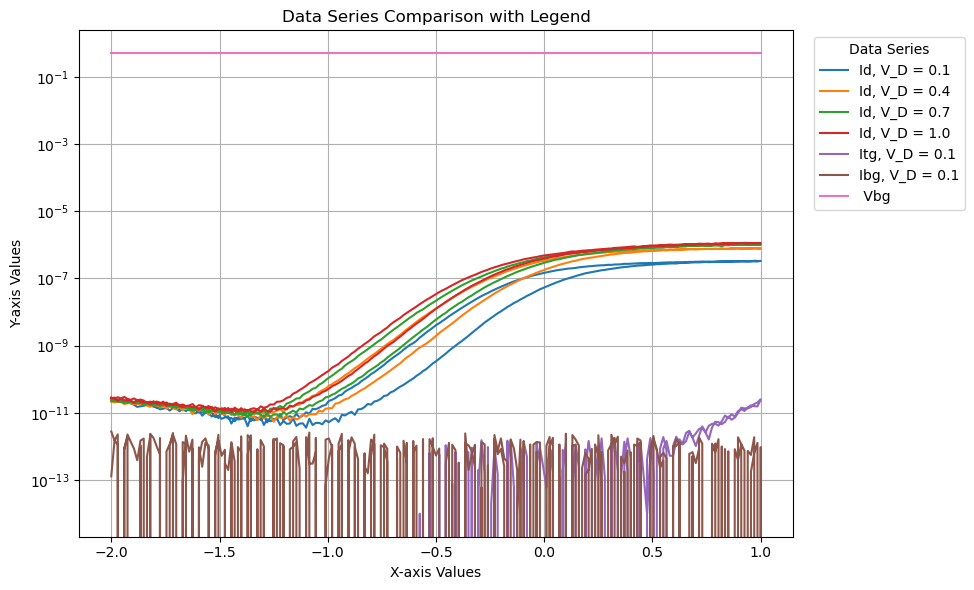

In [11]:
ax = df_new.plot(kind='line', figsize=(10, 6))

# 3. Add labels and title
plt.title('Data Series Comparison with Legend')
plt.xlabel('X-axis Values')
plt.ylabel('Y-axis Values')
plt.yscale('log')

# 4. Customize and display the legend
plt.legend(title='Data Series', loc='upper right', bbox_to_anchor=(1.25, 1)) # Example of placing legend outside
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels/legend from overlapping
plt.show()

In [4]:
for file in file_list:
    print(f'{file} started')
    
    Vbg,df = mo.read_csv_IdVtg(file)
    df_reshaped = mo.reshape_table_by_VG(df)
    df_sorted = mo.reorder_by_VG(df_reshaped,Vbg)

    filename =directory_path + '\\sorted\\' + file[6:]
    df_sorted.to_csv(filename, index=True)

IdVtg\E41-A4_ExfoliatedMoS2_TGIdVg_.csv started
IdVtg\E41-D14_ExfoliatedMoS2_TGIdVg_.csv started
IdVtg\E41-D17_ExfoliatedMoS2_TGIdVg_.csv started
IdVtg\E41-G14_ExfoliatedMoS2_TGIdVg_.csv started
IdVtg\E41-I18_ExfoliatedMoS2_TGIdVg_.csv started
IdVtg\E41-O15_ExfoliatedMoS2_TGIdVg_.csv started
IdVtg\E43-H17_ExfoliatedMoS2_TGIdVg_.csv started
IdVtg\E44-T1_ExfoliatedMoS2_TGIdVg_.csv started
IdVtg\sortedIdVtg.zip started


ValueError: Multiple files found in ZIP file. Only one file per ZIP: ['sorted/', 'sorted/E41-A4_ExfoliatedMoS2_TGIdVg_.csv', 'sorted/E41-D14_ExfoliatedMoS2_TGIdVg_.csv', 'sorted/E41-D17_ExfoliatedMoS2_TGIdVg_.csv', 'sorted/E41-G14_ExfoliatedMoS2_TGIdVg_.csv', 'sorted/E41-I18_ExfoliatedMoS2_TGIdVg_.csv', 'sorted/E41-O15_ExfoliatedMoS2_TGIdVg_.csv', 'sorted/E43-H17_ExfoliatedMoS2_TGIdVg_.csv', 'sorted/E44-T1_ExfoliatedMoS2_TGIdVg_.csv']

In [ ]:
df_new.to_csv(f'IdVtg\\sorted\\{filename[6:]}', index=True)

NameError: name 'df_new' is not defined